<a href="https://colab.research.google.com/github/joker2017/Calculator/blob/master/RU_10_introduction_to_artificial_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

Во-первых, давайте сделаем так, чтобы этот ноутбук хорошо работал как в python 2, так и в 3, импортировал несколько распространенных модулей, гарантируя, что графики MatplotLib встроены и подготовят функцию для сохранения цифр:

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [25]:
y_pred

array([1])

Saving figure perceptron_iris_plot


FileNotFoundError: ignored

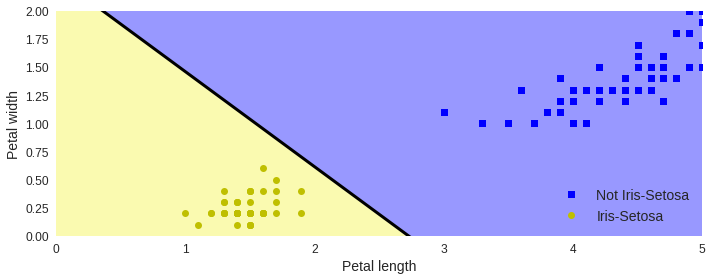

In [26]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [0]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [0]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [0]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

In [0]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using the Estimator API (formerly `tf.contrib.learn`)

In [0]:
import tensorflow as tf

**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

**Предупреждение** : `tf.examples.tutorials.mnist` устарело. Вместо этого мы будем использовать `tf.keras.datasets.mnist`  . Кроме того, `tf.contrib.learn ` API был повышен до `tf.estimators` и `tf.feature_columns`, и он значительно изменился. В частности, нет `infer_real_valued_columns_from_input()` функции или `SKCompat` класса


In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [0]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

In [0]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

In [0]:
eval_results

In [0]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

## Using plain TensorFlow
Использование простого TensorFlow

In [0]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [0]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev) # Выводит случайные значения из усеченного нормального распределения.
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias") # tf.zeros Создает тензор со всеми элементами, установленными на ноль.
        Z = tf.matmul(X, W) + b # tf.matmul умножение
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [0]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")  # Вычисляет среднее значение элементов по размерам тензора

In [0]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)#для каждого образца проверяет коректен ли прогноз сети путем проверки соответствует или нет  
                                          #самый высокий логит целевому классу он возвращает одномерный тензер, наполненный булевскими значениями 
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
                                          # tf.reduce_mean Вычисляет среднее значение элементов по размерам тензора
                                          # приводит булевские значения к значениям с плавающей точкой

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 40
batch_size = 50

In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X)) # np.random.permutation Случайно переставляйте последовательность или возвращайте заданный диапазон / len возвращает длину
    n_batches = len(X) // batch_size #// целочисленное деление
    for batch_idx in np.array_split(rnd_idx, n_batches):  # np.array_split делит масим на несколько массивов
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [0]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [0]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [0]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

In [0]:
#from tensorflow_graph_in_jupyter import show_graph

In [0]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`
Использование `dense()` вместо `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.


---


Примечание: предыдущие версии книги использовались, `tensorflow.contrib.layers.fully_connected()` а не `tf.layers.dense()` (которые не существовали, когда была написана эта глава). Теперь предпочтительнее использовать `tf.layers.dense()`, потому что что-либо в модуле contrib может изменяться или удаляться без уведомления. `dense()` Функция почти идентична `fully_connected()` функции, за исключением нескольких незначительных отличий , за исключением:

* несколько параметров переименовываются: scope становится name, `activation_fn` становится `activation` (и аналогичным образом ` _fn` суффикс удаляется из других параметров, таких как `normalizer_fn`), `weights_initializer` становится `kernel_initializer` и т. д.
* значение по умолчанию activationтеперь, `None` а не `tf.nn.relu`.
* еще несколько различий представлены в главе 11.



In [0]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [0]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [0]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [0]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

Обучите глубокий MLP в наборе данных MNIST и посмотрите, можете ли вы получить более 98% точности. Как и в последнем упражнении главы 9, попробуйте добавить все колокола и свистки (т. Е. Сохранить контрольные точки, восстановить последнюю контрольную точку в случае прерывания, добавить резюме, отобразить кривые обучения с помощью TensorBoard и т. Д.).

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

Сначала давайте создадим глубокую сеть. Это точно так же, как и раньше, с одним дополнением: мы добавляем `tf.summary.scalar()` отслеживание потерь и точности во время обучения, поэтому мы можем просматривать хорошие кривые обучения с помощью TensorBoard.


In [0]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()

In [0]:
import tensorflow as tf
import numpy as np
import os

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [0]:
#reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [0]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [0]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

Теперь нам нужно определить каталог для записи журналов TensorBoard в:

In [0]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [0]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

Теперь мы можем создать то, `FileWriter` что мы будем использовать для записи журналов TensorBoard:

In [0]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

Привет! Почему бы нам не начать раннюю остановку? Для этого нам понадобится использовать набор проверки.

In [0]:
m, n = X_train.shape

In [84]:

n_epochs = 50
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty # True, если вход конечен; в противном случае значение равно False (ввод - либо положительная бесконечность, либо отрицательная бесконечность, либо не номер)
epochs_without_progress = 0
max_epochs_without_progress = 50


def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X)) # np.random.permutation Случайно переставляйте последовательность или возвращайте заданный диапазон / len возвращает длину
    n_batches = len(X) // batch_size #// целочисленное деление
    for batch_idx in np.array_split(rnd_idx, n_batches):  # np.array_split делит масим на несколько массивов
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        # если файл контрольной точки существует, восстановите модель и загрузите номер эпохи
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
       # file_writer.add_summary(accuracy_summary_str, epoch)
       # file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 94.260% 	Loss: 0.19163
Epoch: 5 	Validation accuracy: 96.320% 	Loss: 0.16395
Epoch: 10 	Validation accuracy: 97.160% 	Loss: 0.16883
Epoch: 15 	Validation accuracy: 97.100% 	Loss: 0.17678
Epoch: 20 	Validation accuracy: 97.160% 	Loss: 0.28826
Epoch: 25 	Validation accuracy: 96.820% 	Loss: 0.31844
Epoch: 30 	Validation accuracy: 96.340% 	Loss: 0.38536
Epoch: 35 	Validation accuracy: 96.200% 	Loss: 0.31970
Epoch: 40 	Validation accuracy: 97.060% 	Loss: 0.30107
Epoch: 45 	Validation accuracy: 96.840% 	Loss: 0.33455


In [0]:
os.remove(checkpoint_epoch_path)

In [86]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model1


In [87]:
accuracy_val

0.9606

In [0]:
import tensorflow as tf
import numpy as np
import os

def reset_graph():
    tf.reset_default_graph()
    
reset_graph ()

learning_rate = 0.01
batch_size = 1000

n_neuron_layer_1 = 300
n_neuron_layer_2 = 100
n_output = 10
n_input = 28*28

epoch_max = 1000

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28)
X_test = X_test.astype(np.float32).reshape(-1, 28*28)
y_test = y_test.astype(np.int32)
y_train = y_train.astype(np.int32)

def Shuffle_batch(X, y, batch_size):
  rnd_idx = tf.random.permutation(len(X))
  n_batch = len(X)//batch_size
  for bach_idx in np.array_split(rnd_idx, n_batch):
    X_batch, y_batch = X_batch [bach_idx], y_batch [batch_idx]
  yield X_batch, y_batch
  

X = tf.placeholder(tf.float32, shape=(None, n_input), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
  hidden_1 = tf.layers.dense(X, n_neuron_layer_1, name = "hidden_1", activation = tf.nn.relu )
  hidden_2 = tf.layers.dense(hidden_1, n_neuron_layer_2, name = "hidden_2", activation = tf.nn.relu )
  logit = tf.layers.dense(hidden_2, n_output, name = "logit")
  y_pred = tf.nn.relu(logit)

with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logit)
            
  loss = tf.reduce_mean(xentropy)
  loss_summary = tf.summary.scalar ('log_loss', loss)

with tf.name_scope("train"):
  optimizer = tf.train.AdamOptimizer (learning_rate=learning_rate)
  trainig_op = optimizer.minimize(loss)
               
  
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logit, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
 # accuracy_summary = tf.summary.scalar('accuracy', correct)
   
init = tf.global_variables_initializer()
saver = tf.train.Saver()

check_point_path = 
check_poin_epoch_path = 

with tf.Session() as sess:
  sess.run(init)
  if os.path.isfile(check_point_epoch_path):
    open(checkpoint_epoch_path, "rb")
    with read(checkpoint_epoch_path, "rb") as f:
      epoch_start = int(f.read)
      saver.restore(sess, check_point_path)
  else epoch_start = 0
  
  for epoch_n in range(epoch_start, epoch_max):
    for X_batch, y_batch in shuffle_batch(X_train, y_train, bach_size):
      sess.run(traning_op, feet_dict={X:X_batch, y:y_batch})
    i_loss, i_loss_summary, i_accuracy, i_accuracy_summary = sess.run([loss, loss_summary, accuracy, accuracy_summary], feet_dict{X:X_test:y_test})
    if epoch_n % 5 == 0:
      print("Epoch:", epoch_n, "loss:", i_loss, "accuracy:", i_accuracy)
      saver.save(sess, check_point_path)
      with open(checkpoint_epoch_path, "wb") as op:
        ap.write(n_epoch)


In [17]:
accuracy.shape

TensorShape([])

In [43]:
X_test.shape

(10000, 784)